Welcome!This is the first project of my project series in 2025

## Iris flower clasification model

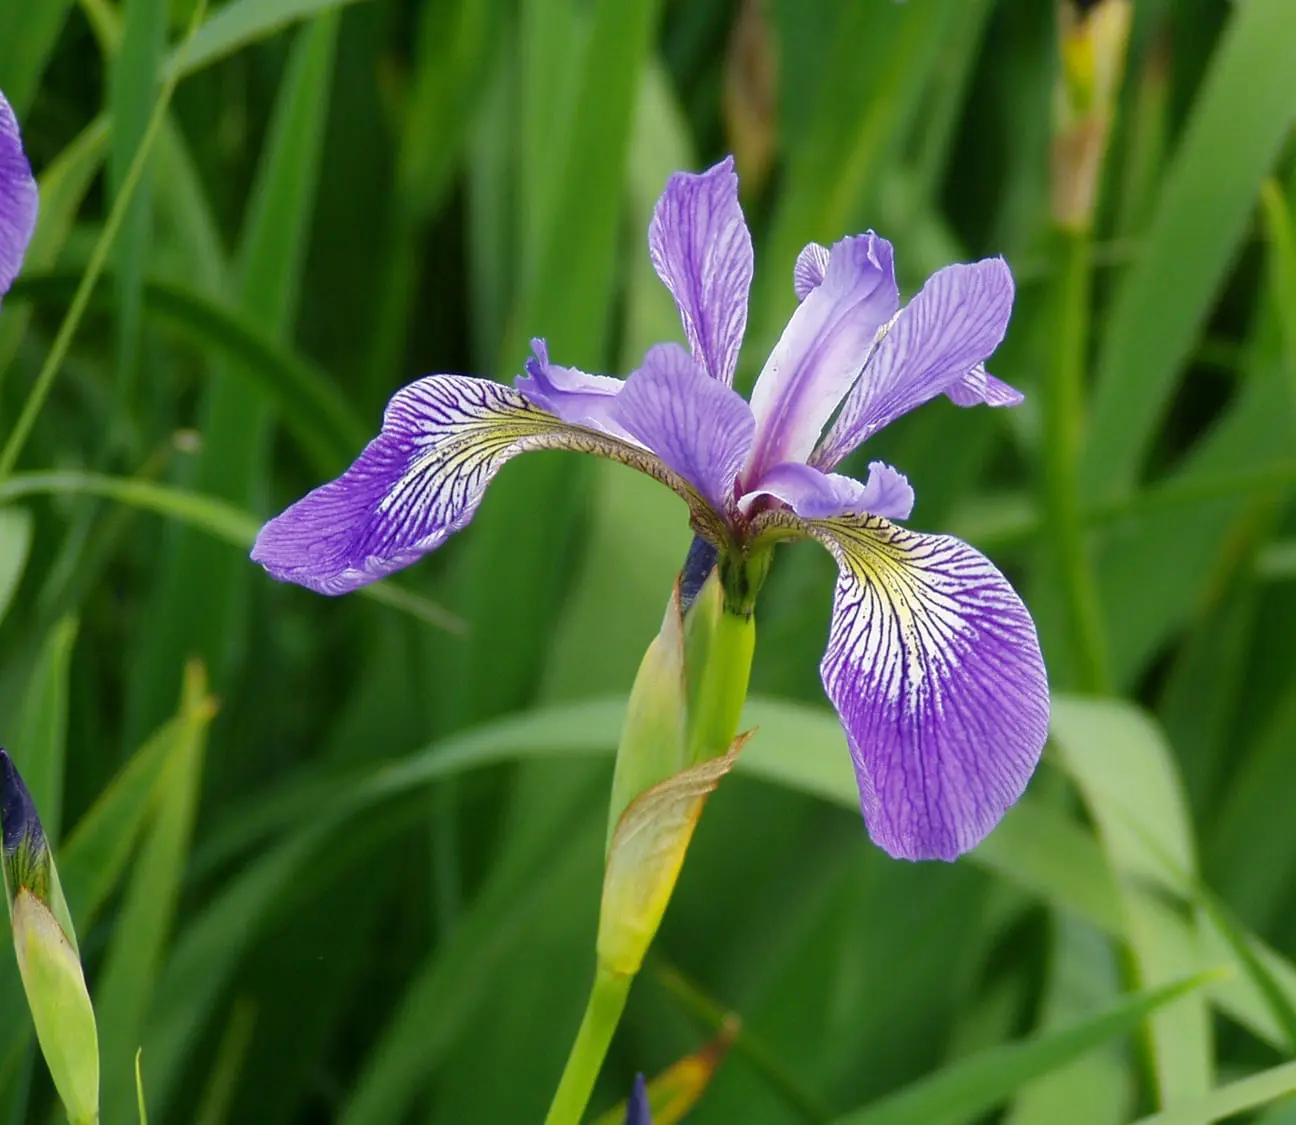

# The Data Set

The data set contains 4 attributes of the Iris flower,

01. Sepal Length
02. Sepal Width
03. Petal length
04. Petal width

By understanding different measures for each attribute, the model can classify which species the given flower is.

In [2]:
#Dependencies

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/2025 projects/Iris Classification/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## **Preprocessing the Data set**

In [8]:
#Checking for null values
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


The data set is already cleaned and no Nulls were found

## **Exploratory Data Analysis**

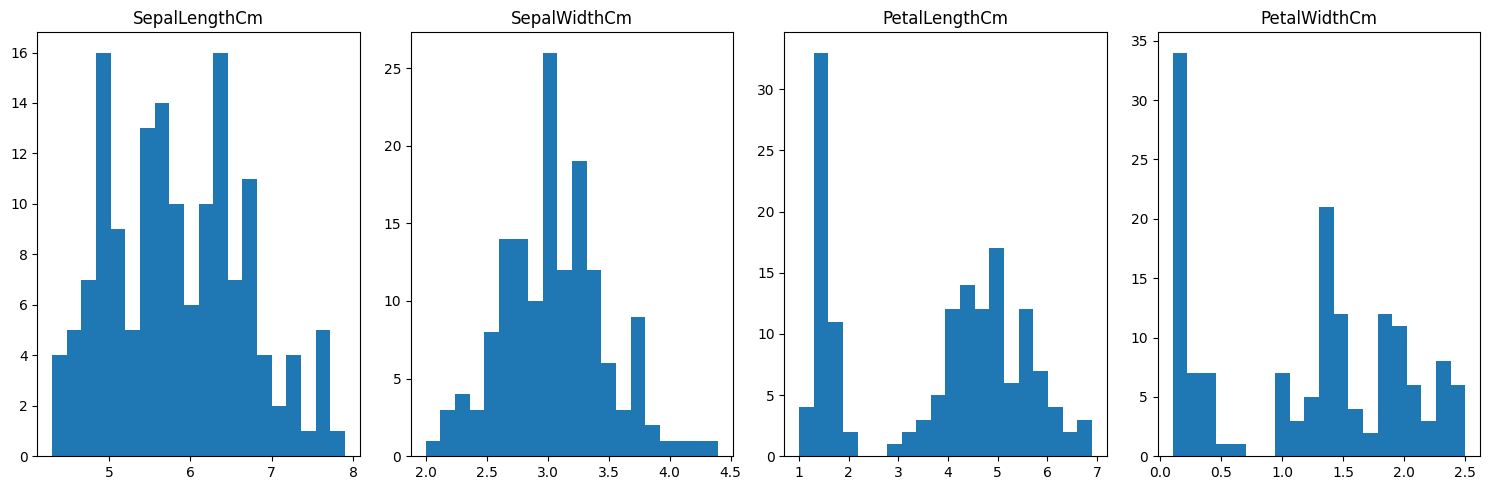

In [9]:
#Creating a 2x2 subplot layout
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot histograms
axes[0].hist(df['SepalLengthCm'], bins=20)
axes[0].set_title('SepalLengthCm')

axes[1].hist(df['SepalWidthCm'], bins=20)
axes[1].set_title('SepalWidthCm')

axes[2].hist(df['PetalLengthCm'], bins=20)
axes[2].set_title('PetalLengthCm')

axes[3].hist(df['PetalWidthCm'], bins=20)
axes[3].set_title('PetalWidthCm')

# Adjust layout
plt.tight_layout()
plt.show()

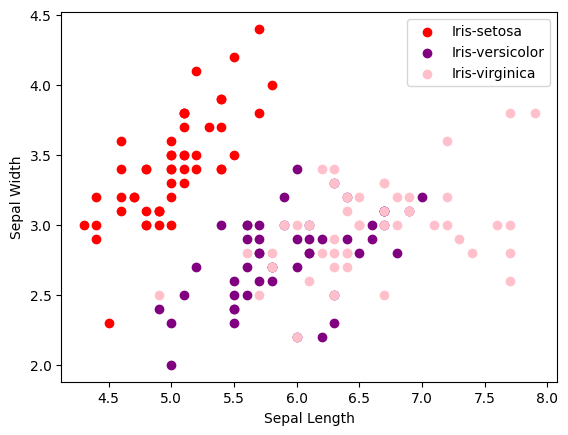

In [10]:
#Scatterplot
colors = ['red','purple','pink']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i], label=species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.legend()

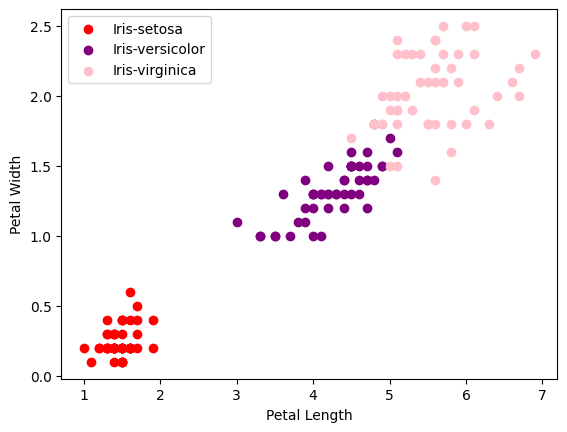

In [11]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i], label=species[i])
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.legend()

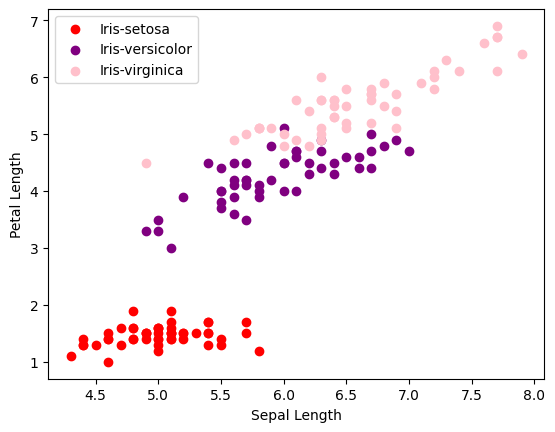

In [12]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i], label=species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Petal Length')
  plt.legend()

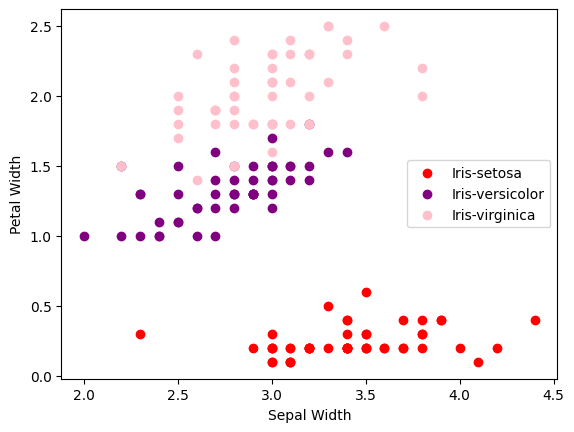

In [13]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i], label=species[i])
  plt.xlabel('Sepal Width')
  plt.ylabel('Petal Width')
  plt.legend()

## **Correlation Matrix**

In [14]:
# Select only the numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


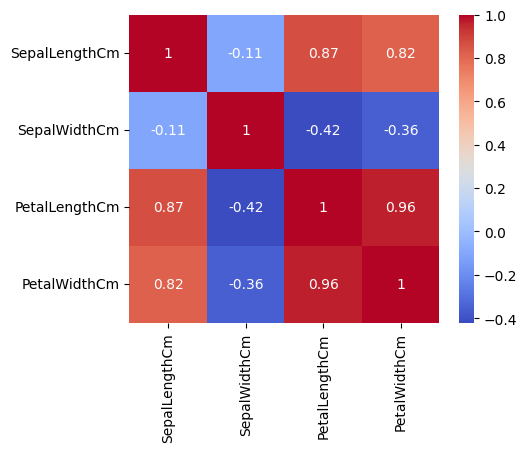

In [15]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

## **Label Encoder**

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **Model Training**

In [17]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='Species')
y = df['Species']
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.30)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [18]:
#Logistic regression model training

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [19]:
#Accuracy
print('Accuracy', lr.score(x_test,y_test)*100)

Accuracy 97.77777777777777


In [20]:
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
print('Accuracy', kn.score(x_test,y_test)*100)

Accuracy 97.77777777777777


In [23]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
print('Accuracy', dt.score(x_test,y_test)*100)

Accuracy 97.77777777777777
